In [1]:
import pandas as pd
import numpy as np
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from IPython.display import display

In [2]:

#
#nltk.download('punkt')

# Data Cleaning Step 

## Import Data

In [3]:
dataset = pd.read_csv('netflix_titles.csv')
print(dataset.shape)
dataset.head(10)

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...




## Drop unnecessary column

In [4]:
dataset_clean = dataset.drop(['show_id','type','cast','date_added','rating','duration','listed_in'], axis=1)
dataset_clean.head()

,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,South Africa,2021,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,NaN,2021,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,2021,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,India,2021,In a city of coaching centers known to train I...


## Fill NaN

In [5]:
# We fill the missing value with 'unknown'
dataset_clean = dataset_clean.fillna('Unknown')
dataset_clean.head() # we could see the country has been filled by Unknown

,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown,South Africa,2021,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,Unknown,2021,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,Unknown,Unknown,2021,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,Unknown,India,2021,In a city of coaching centers known to train I...


## Remove stop word in description

In [6]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
dataset_clean['description'] = dataset_clean['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dataset_clean.head() # we could see that the stopwords has been removed in description.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"As father nears end life, filmmaker Kirsten Jo..."
1,Blood & Water,Unknown,South Africa,2021,"After crossing paths party, Cape Town teen set..."
2,Ganglands,Julien Leclercq,Unknown,2021,"To protect family powerful drug lord, skilled ..."
3,Jailbirds New Orleans,Unknown,Unknown,2021,"Feuds, flirtations toilet talk go among incarc..."
4,Kota Factory,Unknown,India,2021,In city coaching centers known train India’s f...


## Lemmatize the word in description

In [7]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
dataset_clean['description'] = dataset_clean['description'].apply(lemmatize_words)
dataset_clean.head()
# we could see the second line crossing is lemmatized to cross, this could increase the accuracy of searching

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"As father near end life, filmmaker Kirsten Joh..."
1,Blood & Water,Unknown,South Africa,2021,"After cross paths party, Cape Town teen set pr..."
2,Ganglands,Julien Leclercq,Unknown,2021,"To protect family powerful drug lord, skilled ..."
3,Jailbirds New Orleans,Unknown,Unknown,2021,"Feuds, flirtations toilet talk go among incarc..."
4,Kota Factory,Unknown,India,2021,In city coach center know train India’s finest...


## Convert description into lower case

In [8]:
dataset_clean['description'] = dataset_clean['description'].apply(lambda x: x.lower() if type(x) == str else x)
dataset_clean.head()

,title,director,country,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,"as father near end life, filmmaker kirsten joh..."
1,Blood & Water,Unknown,South Africa,2021,"after cross paths party, cape town teen set pr..."
2,Ganglands,Julien Leclercq,Unknown,2021,"to protect family powerful drug lord, skilled ..."
3,Jailbirds New Orleans,Unknown,Unknown,2021,"feuds, flirtations toilet talk go among incarc..."
4,Kota Factory,Unknown,India,2021,in city coach center know train india’s finest...


# Index Part

## Inport tools from sklearn 

In [9]:
!pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()

## Get description in csv column into document list

In [11]:
documents = dataset_clean['description'].to_numpy()
documents[:10]

array(['as father near end life, filmmaker kirsten johnson stag death inventive comical ways help face inevitable.',
       'after cross paths party, cape town teen set prove whether private-school swim star sister abduct birth.',
       'to protect family powerful drug lord, skilled thief mehdi expert team robbers pull violent deadly turf war.',
       'feuds, flirtations toilet talk go among incarcerate women orleans justice center new orleans gritty reality series.',
       'in city coach center know train india’s finest collegiate minds, earnest unexceptional student friends navigate campus life.',
       'the arrival charismatic young priest bring glorious miracles, ominous mysteries renew religious fervor die town desperate believe.',
       "equestria's divided. but bright-eyed hero believe earth ponies, pegasi unicorns pal — and, hoof heart, she’s determine prove it.",
       'on photo shoot ghana, american model slip back time, become enslave plantation bear witness agony ance

## Get vocabulary list

In [12]:
documents_vectorized = vectorizer.fit_transform(documents)
vocabulary = vectorizer.get_feature_names() #or get_feature_name_out

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
vocabulary

['000',
 '007',
 '009',
 '10',
 '100',
 '1000',
 '102',
 '108',
 '10th',
 '11',
 '112',
 '11th',
 '12',
 '12th',
 '13',
 '130',
 '13th',
 '14',
 '1402',
 '14th',
 '15',
 '150',
 '1590',
 '15k',
 '15th',
 '16',
 '1609',
 '1623',
 '1666',
 '16th',
 '17',
 '1720',
 '1778',
 '17th',
 '18',
 '1800s',
 '1806',
 '1812',
 '1821',
 '1827',
 '1843',
 '1854',
 '1860s',
 '1866',
 '1867',
 '1870',
 '1871',
 '1879',
 '1880s',
 '1881',
 '1888',
 '1890',
 '1890s',
 '1892',
 '1895',
 '1897',
 '1899',
 '18th',
 '19',
 '1900',
 '1900s',
 '1901',
 '1902',
 '1905',
 '1913',
 '1915',
 '1917',
 '1919',
 '1920',
 '1920s',
 '1921',
 '1927',
 '1929',
 '1930s',
 '1931',
 '1934',
 '1936',
 '1937',
 '1940',
 '1940s',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1950s',
 '1951',
 '1953',
 '1958',
 '1959',
 '1960',
 '1960s',
 '1961',
 '1962',
 '1963',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '

In [14]:
print ('We have a {} movies with a {} term vocabulary'.format(*documents_vectorized.shape))

We have a 8807 movies with a 17441 term vocabulary


## Term Frequency Matrix

In [15]:
df = pd.DataFrame(documents_vectorized.toarray(), columns=vocabulary)
doc_ids = df.index.values
print('The shape of the term frequency matrix is {}'.format(df.shape))
print('Which means it contains {} movies with {} term vocabulary'.format(*df.shape))
df[:5]

The shape of the term frequency matrix is (8807, 17441)
Which means it contains 8807 movies with 17441 term vocabulary


,000,007,009,10,100,1000,102,108,10th,11,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Finding DF/IDF for each term 

In [16]:
dfs = (df > 0).sum(axis=0)
print('The list below is the document frequency DF')
dfs
# first get the document frequency DF (i.e. how many documents does each phrase appear in?): 

The list below is the document frequency DF


000       38
007        4
009        1
10        44
100       18
          ..
ömer       1
über       2
łukasz     1
ōarai      1
şeref      1
Length: 17441, dtype: int64

In [17]:
N = df.shape[0]
print('Our total ducument is {} which is the total number of movie in dataset '.format(N))

Our total ducument is 8807 which is the total number of movie in dataset 


## ${idf}_t$ is calculated by $idf_t = log\frac{N}{df}$ 

In [18]:
idfs = np.log10(N/dfs)
idfs[:5]

000    2.365044
007    3.342768
009    3.944828
10     2.301375
100    2.689555
dtype: float64

# **BM25 Score**
## The formula for BM25 Score is

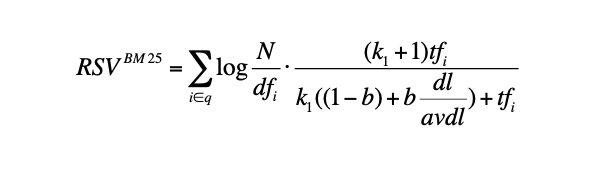

## Define all the variables

In [19]:
k_1 = 1.2 # single value
b = 0.8 # single value
## considering all words in doc
dls = [len(d.split(' ')) for d in documents] # vector
## considering words minus stop words in doc. 
dls = df.sum(axis=1).tolist()
avgdl = np.mean(dls) # single value

## Calculate BM25 Score

In [20]:
numerator = np.array((k_1 + 1) * df)
denominator = np.array(k_1 *((1 - b) + b * (dls / avgdl))).reshape(N,1) + np.array(df)

BM25_tf = numerator / denominator

idfs = np.array(idfs)

BM25_score = BM25_tf * idfs

In [21]:
bm25_idf = pd.DataFrame(BM25_score, columns=vocabulary)
print('The dataframe below is the BM25 scores for each documents.')
bm25_idf

The dataframe below is the BM25 scores for each documents.


,000,007,009,10,100,1000,102,108,10th,11,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a function cleaning query

In [22]:
def clean_query(query):
    cleaned_query=word_tokenize(query)
    specific_words=['want','watch','see','about','relate','I','movie','TV Show'] #specific words that user might used which will not related to movie
    cleaned_query=[word for word in cleaned_query if word not in stopwords.words('english')]
    cleaned_query=[word for word in cleaned_query if word not in specific_words]
    cleaned_query=[word.lower() for word in cleaned_query if word.isalpha()]
    return cleaned_query

In [23]:
#example for a query
nltk.download('punkt')
cleaned_query=clean_query('I want to watch a movie about a father nears the end of his life')
cleaned_query

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['father', 'nears', 'end', 'life']

## Find the score for the query and sorted from large to small

In [24]:
def score(query):
    cleaned_query=clean_query(query)
    cleaned_query_only_df = bm25_idf[cleaned_query]
    score_q_d = cleaned_query_only_df.sum(axis=1)
    sorted_score=sorted(zip(documents,score_q_d.values), key = lambda tup:tup[1], reverse=True)
    result = pd.DataFrame(sorted_score)
    return result
    

In [25]:
#score(cleaned_query)[0][1]

In [26]:
#for n in range(2):
#    movie=(dataset_clean.loc[dataset_clean['description'].str.contains(score(cleaned_query)[0][n])])
#    print('The {} relevant movie with the query you given is :' .format(str(n+1)+("th" if 3<=n%100<=20 else {0:"st",1:"nd",2:"rd"}.get(n%10, "th"))))
#    display(movie)

## Create a function for recommondation

In [35]:
def recommondation(query,n):
    score(query)
    for i in range(n):
        movie=(dataset.loc[dataset_clean['description'].str.contains(score(query)[0][i])])
        print('The {} relevant movie with the query you given is :' .format(str(i+1)+("th" if 3<=n%100<=20 else {0:"st",1:"nd",2:"rd"}.get(n%10, "th"))))
        display(movie)
    

In [37]:
recommondation('I want to watch a movie about criminal in jail',3)

The 1th relevant movie with the query you given is :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7484,s7485,Movie,Money Talks,Brett Ratner,"Charlie Sheen, Chris Tucker, Heather Locklear, Paul Sorvino, Gérard Ismaël, Damian Chapa, Elise Neal, Michael Wright, Veronica Cartwright",United States,"November 1, 2019",1997,R,96 min,"Action & Adventure, Comedies","TV news reporter James Russell helps put small-time criminal Franklin Hatchett in jail, but turns to protecting Hatchett when he escapes from prison."


The 2th relevant movie with the query you given is :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2823,s2824,Movie,Miracle in Cell No. 7,Mehmet Ada Öztekin,"Aras Bulut İynemli, Nisa Sofiya Aksongur, Deniz Baysal, Celile Toyon Uysal, İlker Aksum, Mesut Akusta",Turkey,"March 13, 2020",2019,TV-14,132 min,"Dramas, International Movies","Separated from his daughter, a father with an intellectual disability must prove his innocence when he is jailed for the death of a commander's child."


The 3th relevant movie with the query you given is :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
529,s530,Movie,Return of the Prodigal Son,Youssef Chahine,"Majida El Roumi, Souheir El Morshidy, Shoukry Sarhan, Huda Sultan, Mahmoud El Meleigy, Ahmad Mehrez, Hesham Selim",Egypt,"July 6, 2021",1976,TV-MA,124 min,"Dramas, International Movies","Freed after spending 12 years in jail, a man's homecoming turns into a dark affair as his disillusion clashes with his family's expectations."


In [29]:
pd.set_option('max_colwidth',None) #used to make sure the description display fully. Default 50

# Final Testing

In [38]:
#Please enter what kind of movie are you looking for:
query = 'I want to watch a movie about young priest'
#Please type how many movies do you want to recommend
n=4
recommondation(query,n)

The 1th relevant movie with the query you given is :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8323,s8324,Movie,The Good Catholic,Paul Shoulberg,"Zachary Spicer, Wrenn Schmidt, Danny Glover, John C. McGinley",United States,"January 24, 2018",2017,PG-13,97 min,"Comedies, Dramas, Romantic Movies",A young priest’s faith is tested when he finds himself attracted to a woman he meets at confession and his ideals are shaken to the core.


The 2th relevant movie with the query you given is :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4909,s4910,Movie,Holy Goalie,Curro Velázquez,"Karra Elejalde, Alain Hernández, Juan Manuel Montilla, Joel Bosqued, Macarena García, Tito Valverde, Paco Rueda, Guillermo Furiase, Txema Blasco, Paco Sagarzazu",Spain,"April 27, 2018",2017,TV-MA,95 min,"Comedies, International Movies, Sports Movies",A young priest coaches a team of uncoordinated monks in order to win a soccer tournament and save their monastery from being turned into a hotel.


The 3th relevant movie with the query you given is :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8408,s8409,Movie,The lynx,Stanisław Różewicz,"Jerzy Radziwiłowicz, Franciszek Pieczka, Piotr Bajor, Ryszarda Hanin, Janusz Paluszkiewicz, Henryk Machalica, Hanna Mikuć, Maria Klejdysz",Poland,"October 1, 2019",1982,TV-14,82 min,"Dramas, International Movies",A priest's duties are tested when a young guerrilla asks for absolution while confessing his plans to murder a local man he believes is a traitor.


The 4th relevant movie with the query you given is :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8548,s8549,Movie,The Vatican Tapes,Mark Neveldine,"Olivia Taylor Dudley, Michael Peña, Dougray Scott, Djimon Hounsou, Peter Andersson, Kathleen Robertson, John Patrick Amedori, Michael Paré, Alex Sparrow, Cas Anvar",United States,"April 20, 2020",2015,PG-13,91 min,"Horror Movies, Thrillers",A young woman hospitalized for an infected wound becomes possessed by a satanic force that will take a priest and two Vatican exorcists to defeat.
